<a href="https://colab.research.google.com/github/Debojit-D/ES666-CV/blob/main/22110067_ES666_Assingment_A_Can_you_Solve_The_Mystery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:00<00:00, 137.92it/s]


In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

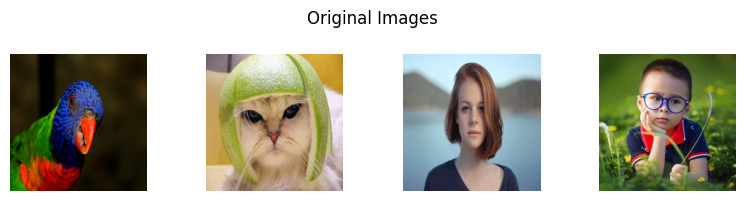

In [ ]:
show_image_grid(gt_images, 1, 4, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):

    image_array = np.array(image)
    noisy_image = np.copy(image_array)

    row, col, ch = image_array.shape

    for i in range(row):
      for j in range(col):
        random = np.random.random()
        if random < noise_prob / 2:
          noisy_image[i,j] = [255, 255, 255]
        elif random < noise_prob:
          noisy_image[i,j] = [0, 0, 0]

    return noisy_image

def add_gaussian_noise(image, mean, std):
    image_array = np.array(image)
    noisy_image = image_array + np.random.normal(mean, std, image_array.shape)
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image.astype(np.uint8)

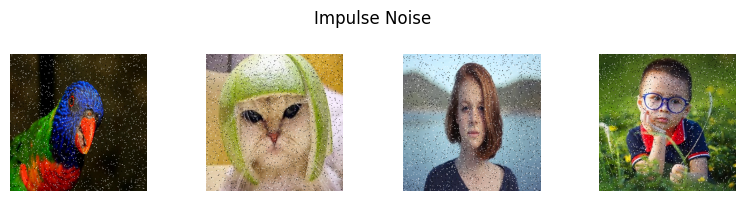

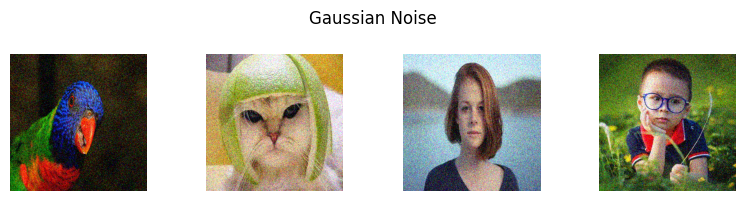

In [ ]:
# Write code here
impulse_noisy_images  = []
gaussian_noisy_images = []

# Write code here for variation in noise parameter

for image in gt_images:
    impulse_noisy_images.append(add_impulse_noise(image, noise_prob=0.05))
    gaussian_noisy_images.append(add_gaussian_noise(image, mean=0., std=30))

impulse_noisy_images = np.array(impulse_noisy_images)
gaussian_noisy_images = np.array(gaussian_noisy_images)

show_image_grid(impulse_noisy_images, M=1, N=4, title='Impulse Noise')
show_image_grid(gaussian_noisy_images, M=1, N=4, title='Gaussian Noise')

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
def apply_box_filter(image, kernel_size):
    image_array = np.array(image)
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    height, width, channels = image_array.shape
    blurred_image = np.zeros((height, width, channels))
    pad_size = kernel_size // 2
    padded_image = np.pad(image_array,((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode = 'constant', constant_values=0)
    for i in range(height):
      for j in range(width):
        for k in range(channels):
          roi = padded_image[i:i+kernel_size, j:j+kernel_size,k]
          blurred_image[i,j,k] = np.sum(roi*kernel)
    blurred_image = np.clip(blurred_image, 0, 255)
    return blurred_image.astype(np.uint8)

def apply_gaussain_filter(image, kernel_size, sigma):
    image_array = np.array(image)
    height,width,channels = image_array.shape
    blurred_image = np.zeros((height, width, channels))
    pad_size = kernel_size // 2
    padded_image = np.pad(image_array, ((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode = 'constant', constant_values = 0)

    kernel = np.zeros((kernel_size, kernel_size))
    for x in range(-pad_size, pad_size + 1):
      for y in range(-pad_size, pad_size + 1):
        kernel[x + pad_size, y+pad_size] = (1/(2*np.pi*sigma**2))*np.exp(-0.5*(x**2+y**2)/sigma**2)


    for i in range (height):
      for j in range (width):
        for k in range (channels):
          roi = padded_image[i:i+kernel_size, j:j+kernel_size,k]
          blurred_image[i,j,k] = np.sum(roi*kernel)
    blurred_image = np.clip(blurred_image, 0, 255)

    return blurred_image.astype(np.uint8)

def apply_median_filter(image, kernel_size):
    image_array = np.array(image)
    kernel = np.zeros((kernel_size, kernel_size))
    height, width, channels = image_array.shape
    filtered_image = np.zeros((height, width, channels))
    pad_size = kernel_size // 2
    padded_image = np.pad(image_array,((pad_size, pad_size), (pad_size, pad_size), (0,0)), mode = 'constant', constant_values=0)

    for i in range (height):
      for j in range (width):
        for k in range (channels):
          roi = padded_image[i:i + kernel_size, j:j + kernel_size, k]
          filtered_image[i, j, k] = np.median(roi)
    return filtered_image.astype(np.uint8)

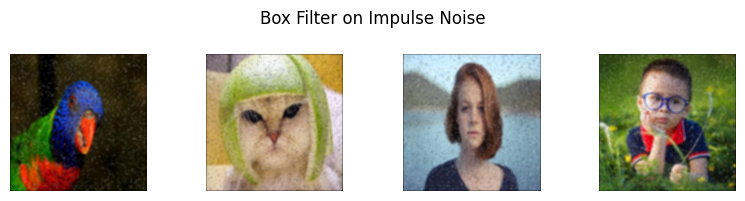

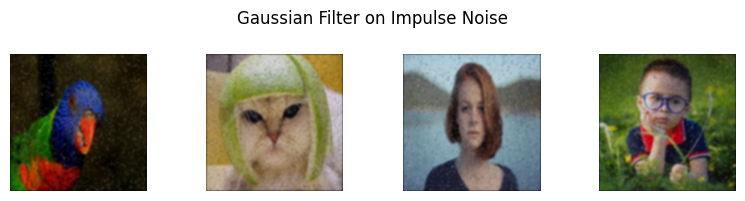

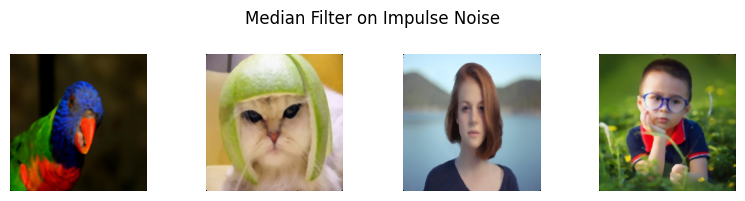

In [ ]:
# Write code here
box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=1, N=4, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=1, N=4, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=1, N=4, title='Median Filter on Impulse Noise')

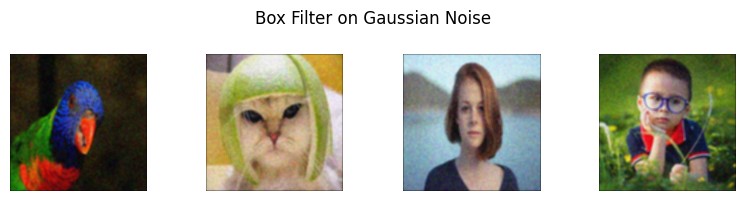

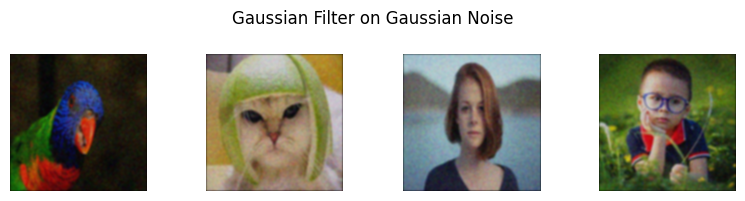

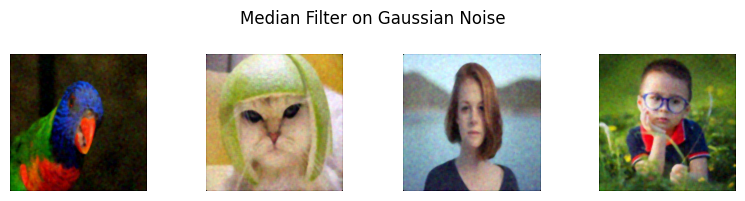

In [ ]:
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussain_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=1, N=4, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=1, N=4, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=1, N=4, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
def convolve(image, kernel):
    kernel = np.flipud(np.fliplr(kernel))
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape

    pad_h = kernel_h // 2
    pad_w = kernel_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    output = np.zeros_like(image, dtype=np.float64)

    for i in range(image_h):
        for j in range(image_w):
            region = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(region * kernel)

    return output

In [ ]:
def gaussian_kernel(size, sigma=1.4):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

In [ ]:
def compute_gradients(smoothed):
    # Sobel kernels
    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float64)
    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]], dtype=np.float64)

    smoothed = smoothed.astype(np.float64)

    Ix = convolve(smoothed, Kx)
    Iy = convolve(smoothed, Ky)

    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return G, theta

In [ ]:
def non_maximum_suppression(G, theta):
    M, N = G.shape
    Z = np.zeros((M,N), dtype=np.float64)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                # Angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = G[i, j+1]
                    r = G[i, j-1]
                # Angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = G[i+1, j-1]
                    r = G[i-1, j+1]
                # Angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = G[i+1, j]
                    r = G[i-1, j]
                # Angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = G[i-1, j-1]
                    r = G[i+1, j+1]

                if (G[i,j] >= q) and (G[i,j] >= r):
                    Z[i,j] = G[i,j]
                else:
                    Z[i,j] = 0
            except IndexError as e:
                pass
    return Z

In [ ]:
def double_thresholding(Z, lowThresholdRatio, highThresholdRatio):
    highThreshold = Z.max() * highThresholdRatio
    lowThreshold = highThreshold * lowThresholdRatio # to ponder later
    res = np.zeros_like(Z, dtype=np.float64)
    strong = np.float64(255)
    weak = np.float64(25)
    strong_i, strong_j = np.where(Z >= highThreshold)
    weak_i, weak_j = np.where((Z <= highThreshold) & (Z >= lowThreshold))
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    return res, weak, strong

def dfs(res, weak, strong, x, y):
    stack = [(x, y)]
    while stack:
        i, j = stack.pop()
        if res[i, j] == weak:
            res[i, j] = strong
            # Check all 8 neighbors and add weak edge neighbors to the stack
            for ni in range(i-1, i+2):
                for nj in range(j-1, j+2):
                    if (ni, nj) != (i, j) and res[ni, nj] == weak:
                        stack.append((ni, nj))

# Hysteresis thresholding function using DFS
def edge_tracking_by_hysteresis(res, weak, strong=255):
    M, N = res.shape
    # Iterate over every pixel to start DFS from each strong pixel
    for i in range(1, M-1):
        for j in range(1, N-1):
            if res[i, j] == strong:
                # Perform DFS from the current strong pixel
                dfs(res, weak, strong, i, j)
    return res

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)
    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    return edges

def apply_canny_edge_detector_self(image, threshold1, threshold2):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    kernel_size = 5
    sigma = 1.4
    gaussian = gaussian_kernel(kernel_size, sigma)
    smoothed = convolve(gray.astype(np.float64), gaussian)
    G, theta = compute_gradients(smoothed)

    #show_image_grid(G, M=1, N=1, title='G')

    Z = non_maximum_suppression(G, theta)

    #show_image_grid(Z, M=1, N=1, title='Z')

    lowThresholdRatio = (threshold1 / 255)*0.8
    highThresholdRatio = (threshold2 / 255)*0.8
    res, weak, strong = double_thresholding(Z, lowThresholdRatio, highThresholdRatio)

    edges = edge_tracking_by_hysteresis(res, weak, strong)
    edges = edges.astype(np.uint8)
    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
threshold1 = 80
threshold2 = 180

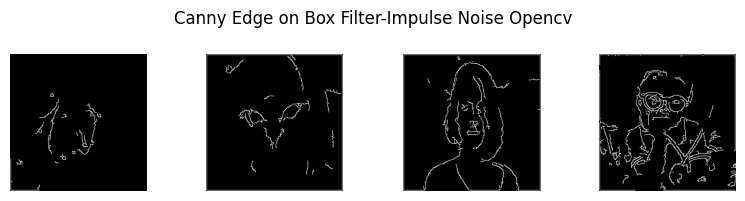

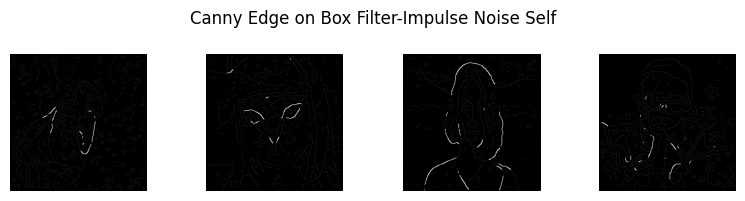

In [ ]:
canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_box_filter_images_impulse, M=1, N=4, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=1, N=4, title='Canny Edge on Box Filter-Impulse Noise Self')

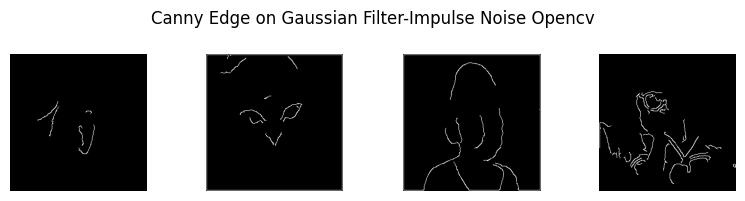

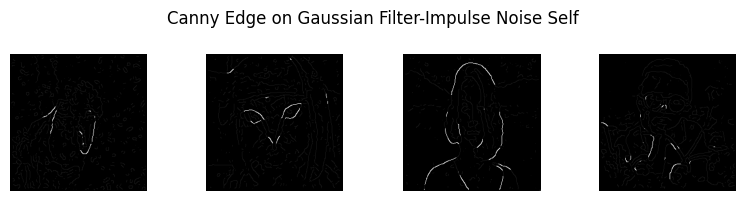

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_gaussian_filter_images_impulse, M=1, N=4, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=1, N=4, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

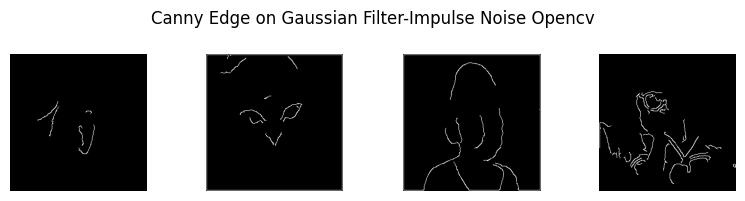

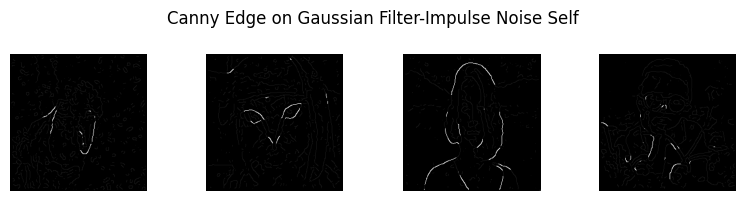

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_gaussian_filter_images_impulse, M=1, N=4, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=1, N=4, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

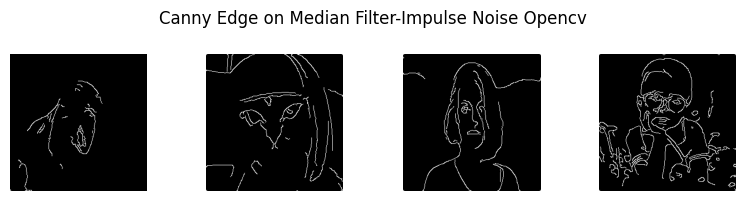

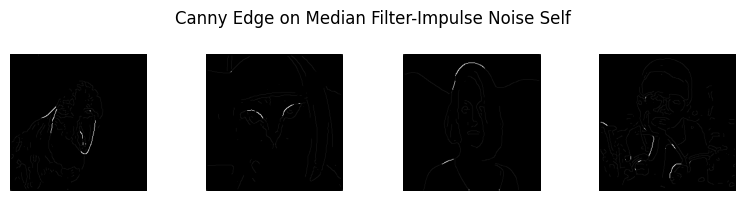

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_median_filter_images_impulse, M=1, N=4, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=1, N=4, title='Canny Edge on Median Filter-Impulse Noise Self')

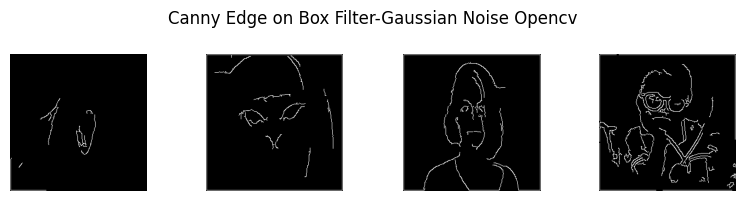

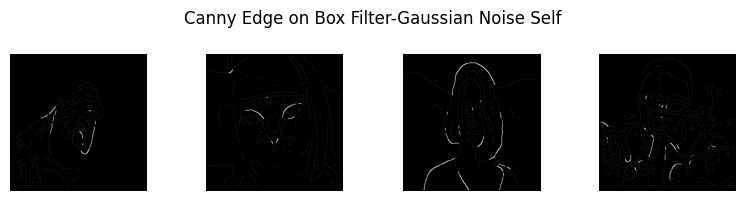

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_box_filter_images_gaussian, M=1, N=4, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=1, N=4, title='Canny Edge on Box Filter-Gaussian Noise Self')

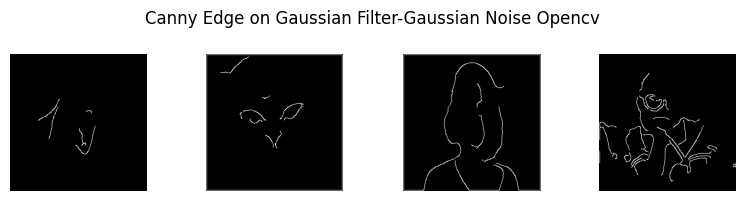

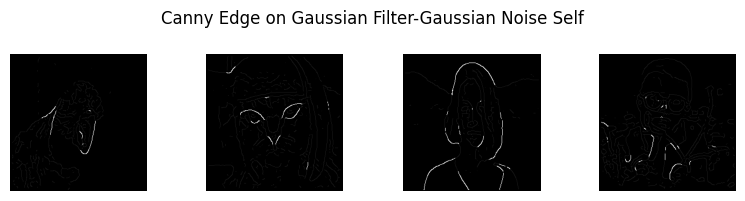

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_gaussian_filter_images_gaussian, M=1, N=4, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=1, N=4, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

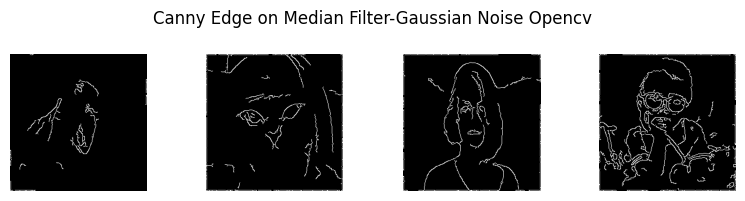

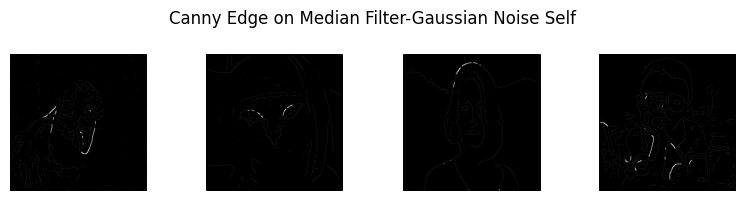

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_median_filter_images_gaussian, M=1, N=4, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=1, N=4, title='Canny Edge on Median Filter-Gaussian Noise Self')

In [ ]:
import numpy as np
import math
from sklearn.metrics import mean_squared_error
import pandas as pd
import cv2

# Define the list of filter and noise combinations
filter_noise_combinations = [
    ("Box Filter Impulse Noise", canny_edge_opencv_box_filter_images_impulse, canny_edge_self_box_filter_images_impulse),
    ("Gaussian Filter Impulse Noise", canny_edge_opencv_gaussian_filter_images_impulse, canny_edge_self_gaussian_filter_images_impulse),
    ("Median Filter Impulse Noise", canny_edge_opencv_median_filter_images_impulse, canny_edge_self_median_filter_images_impulse),
    ("Box Filter Gaussian Noise", canny_edge_opencv_box_filter_images_gaussian, canny_edge_self_box_filter_images_gaussian),
    ("Gaussian Filter Gaussian Noise", canny_edge_opencv_gaussian_filter_images_gaussian, canny_edge_self_gaussian_filter_images_gaussian),
    ("Median Filter Gaussian Noise", canny_edge_opencv_median_filter_images_gaussian, canny_edge_self_median_filter_images_gaussian)
]

# Initialize an empty list to store RMSE values
rmse_table = []

# Loop through each filter and noise combination
for name, opencv_images, self_images in filter_noise_combinations:
    rmse_list = []
    # Loop through each pair of images in the current set
    for i in range(len(opencv_images)):
        # Get the corresponding images
        edges_opencv = opencv_images[i]
        edges_self = self_images[i]

        # Ensure images are grayscale for RMSE computation
        if len(edges_opencv.shape) == 3 and edges_opencv.shape[2] == 3:
            edges_opencv_gray = cv2.cvtColor(edges_opencv, cv2.COLOR_BGR2GRAY)
        else:
            edges_opencv_gray = edges_opencv

        if len(edges_self.shape) == 3 and edges_self.shape[2] == 3:
            edges_self_gray = cv2.cvtColor(edges_self, cv2.COLOR_BGR2GRAY)
        else:
            edges_self_gray = edges_self

        # **Convert images to float64 to prevent underflow/overflow**
        edges_opencv_gray = edges_opencv_gray.astype(np.float64)
        edges_self_gray = edges_self_gray.astype(np.float64)

        # **Optional: Normalize pixel values to range [0, 1]**
        # edges_opencv_gray /= 255.0
        # edges_self_gray /= 255.0

        # Flatten the images
        edges_opencv_flat = edges_opencv_gray.flatten()
        edges_self_flat = edges_self_gray.flatten()

        # Compute RMSE
        rmse = math.sqrt(mean_squared_error(edges_opencv_flat, edges_self_flat))
        rmse_list.append(rmse)
    rmse_table.append(rmse_list)

# Create a DataFrame from the RMSE values
df = pd.DataFrame(
    rmse_table,
    index=[
        "Box Filter Impulse Noise",
        "Gaussian Filter Impulse Noise",
        "Median Filter Impulse Noise",
        "Box Filter Gaussian Noise",
        "Gaussian Filter Gaussian Noise",
        "Median Filter Gaussian Noise"
    ],
    columns=["Image 1", "Image 2", "Image 3", "Image 4"]
)

# Display the RMSE table
print("RMSE Table of Size 6 x 4")
print(df)


RMSE Table of Size 6 x 4
                                  Image 1    Image 2    Image 3    Image 4
Box Filter Impulse Noise        27.263386  43.364829  47.774535  63.461245
Gaussian Filter Impulse Noise   14.318524  36.297587  36.199795  35.102123
Median Filter Impulse Noise     27.618389  41.642672  38.986547  56.558949
Box Filter Gaussian Noise       21.908535  42.388141  43.468257  57.850580
Gaussian Filter Gaussian Noise  13.332850  35.565001  36.404123  37.027505
Median Filter Gaussian Noise    30.270174  48.317008  48.608008  64.076492
